<a href="https://colab.research.google.com/github/flowerbombs/HI-2022-Final/blob/main/HI_2022_Final_Exploring_Caesarian_Section_Predictive_Models_and_Visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from scipy.io import arff
from matplotlib import cm
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import randn
from numpy.random import seed
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor


In [ ]:
raw_data = pd.read_csv('/content/gdrive/My Drive/HI2022_Final/caesarian.csv.arff')

In [ ]:
print(raw_data.columns)

Index(['@relation caesarian'], dtype='object')


In [ ]:
data, meta = arff.loadarff('/content/gdrive/My Drive/HI2022_Final/caesarian.csv.arff')

In [ ]:
raw_data = pd.DataFrame(data)

In [ ]:
print(raw_data.columns)

Index(['Age', 'Delivery number', 'Delivery time', 'Blood of Pressure',
       'Heart Problem', 'Caesarian'],
      dtype='object')


In [ ]:
raw_data

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,b'22',b'1',b'0',b'2',b'0',b'0'
1,b'26',b'2',b'0',b'1',b'0',b'1'
2,b'26',b'2',b'1',b'1',b'0',b'0'
3,b'28',b'1',b'0',b'2',b'0',b'0'
4,b'22',b'2',b'0',b'1',b'0',b'1'
...,...,...,...,...,...,...
75,b'27',b'2',b'1',b'1',b'0',b'0'
76,b'33',b'4',b'0',b'1',b'0',b'1'
77,b'29',b'2',b'1',b'2',b'0',b'1'
78,b'25',b'1',b'2',b'0',b'0',b'1'


In [ ]:
for column in raw_data.columns:
  raw_data[column] = raw_data[column].str.decode('utf-8', errors='ignore')

In [ ]:
raw_data

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
...,...,...,...,...,...,...
75,27,2,1,1,0,0
76,33,4,0,1,0,1
77,29,2,1,2,0,1
78,25,1,2,0,0,1


In [ ]:
#Data Visulization 1: Distribution of Caesarian 'Yes' or 'No' Outcomes
caesarian_counts = raw_data['Caesarian'].value_counts()

([<matplotlib.axis.XTick at 0x7d5613d29720>,
 [Text(0, 0, 'No'), Text(1, 0, 'Yes')])

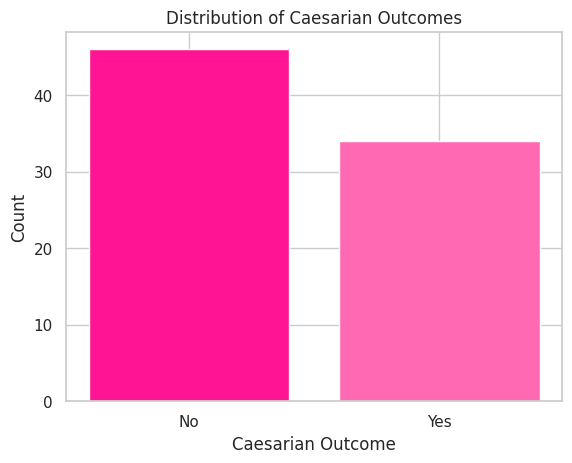

In [ ]:
plt.bar(caesarian_counts.index, caesarian_counts.values, color=['deeppink', 'hotpink'])
plt.xlabel('Caesarian Outcome')
plt.ylabel('Count')
plt.title('Distribution of Caesarian Outcomes')
plt.xticks([0, 1], ['No', 'Yes'])

In [ ]:
raw_data

,Age,Delivery number,Delivery time,Blood of Pressure,Heart Problem,Caesarian
0,22,1,0,2,0,0
1,26,2,0,1,0,1
2,26,2,1,1,0,0
3,28,1,0,2,0,0
4,22,2,0,1,0,1
...,...,...,...,...,...,...
75,27,2,1,1,0,0
76,33,4,0,1,0,1
77,29,2,1,2,0,1
78,25,1,2,0,0,1


In [ ]:
cesarean_yes_data = raw_data[raw_data['Caesarian'] == 1]

In [ ]:
print(cesarean_yes_data)

Empty DataFrame
Columns: [Age, Delivery number, Delivery time, Blood of Pressure, Heart Problem, Caesarian]
Index: []


In [ ]:
print(raw_data['Caesarian'].value_counts())

1    46
0    34
Name: Caesarian, dtype: int64


In [ ]:
raw_data['Caesarian'] = raw_data['Caesarian'].astype(int)

In [ ]:
cesarean_yes_data = raw_data[raw_data['Caesarian'] == 1]

In [ ]:
print(cesarean_yes_data)

   Age Delivery number Delivery time Blood of Pressure Heart Problem  \
1   26               2             0                 1             0   
4   22               2             0                 1             0   
7   32               3             0                 1             0   
9   27               1             1                 1             0   
11  33               1             1                 0             0   
14  29               1             2                 0             1   
17  20               1             2                 2             0   
18  37               3             0                 1             1   
19  24               1             2                 0             1   
21  33               2             0                 0             1   
23  27               1             0                 0             1   
24  20               1             0                 2             1   
26  18               1             1                 2          

In [ ]:
#Data Visualization 2: Distribution of Cesarian '1'= Yes Outcomes by Delivery Time
delivery_time_counts = cesarean_yes_data['Delivery time'].value_counts()

In [ ]:
delivery_time_mapping = {0: 'Timely', 1: 'Premature', 2: 'Latecomer'}

In [ ]:
delivery_time_labels = [delivery_time_mapping[int(index)] for index in delivery_time_counts.index]

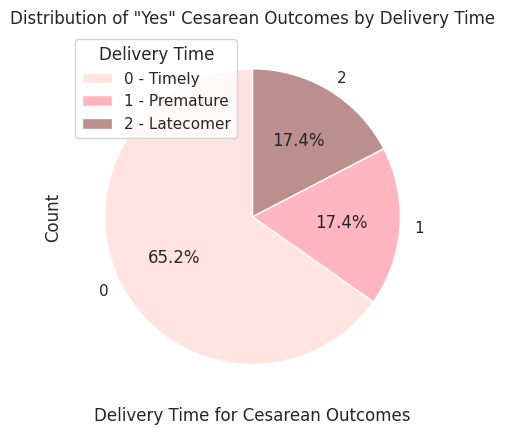

In [ ]:
plt.pie(delivery_time_counts.values, labels=delivery_time_counts.index, autopct='%1.1f%%', startangle=90, colors=['mistyrose', 'lightpink', 'rosybrown'])
plt.xlabel('Delivery Time for Cesarean Outcomes')
plt.ylabel('Count')
plt.title('Distribution of "Yes" Cesarean Outcomes by Delivery Time')
plt.legend(title='Delivery Time', labels= [f"{key} - {value}" for key, value in delivery_time_mapping.items()],loc='upper left')
plt.show()

In [ ]:
raw_data = pd.read_csv('/content/gdrive/My Drive/HI2022_Final/caesarian.csv.arff')

In [ ]:
print(raw_data.columns)

Index(['@relation caesarian'], dtype='object')


In [ ]:
data, meta = arff.loadarff('/content/gdrive/My Drive/HI2022_Final/caesarian.csv.arff')

In [ ]:
raw_data = pd.DataFrame(data)

In [ ]:
for column in raw_data.columns:
  raw_data[column] = raw_data[column].str.decode('utf-8', errors='ignore')

In [ ]:
print(raw_data)

   Age Delivery number Delivery time Blood of Pressure Heart Problem Caesarian
0   22               1             0                 2             0         0
1   26               2             0                 1             0         1
2   26               2             1                 1             0         0
3   28               1             0                 2             0         0
4   22               2             0                 1             0         1
..  ..             ...           ...               ...           ...       ...
75  27               2             1                 1             0         0
76  33               4             0                 1             0         1
77  29               2             1                 2             0         1
78  25               1             2                 0             0         1
79  24               2             2                 1             0         0

[80 rows x 6 columns]


In [ ]:
print(raw_data[raw_data['Caesarian'] == '1'])

   Age Delivery number Delivery time Blood of Pressure Heart Problem Caesarian
1   26               2             0                 1             0         1
4   22               2             0                 1             0         1
7   32               3             0                 1             0         1
9   27               1             1                 1             0         1
11  33               1             1                 0             0         1
14  29               1             2                 0             1         1
17  20               1             2                 2             0         1
18  37               3             0                 1             1         1
19  24               1             2                 0             1         1
21  33               2             0                 0             1         1
23  27               1             0                 0             1         1
24  20               1             0                

In [ ]:
heart_problem_counts = raw_data['Heart Problem'].value_counts()

In [ ]:
print("Heart Problem Counts:", heart_problem_counts)

Heart Problem Counts: 0    50
1    30
Name: Heart Problem, dtype: int64


In [ ]:
blood_of_pressure_counts = raw_data['Blood of Pressure'].value_counts()

In [ ]:
print("Blood of Pressure Counts:", blood_of_pressure_counts)

Blood of Pressure Counts: 1    40
2    20
0    20
Name: Blood of Pressure, dtype: int64


In [ ]:
print("Length of Blood Pressure Counts:", len(blood_of_pressure_counts))
print("Length of Heart Problem Counts:", len(heart_problem_counts))

Length of Blood Pressure Counts: 3
Length of Heart Problem Counts: 2


In [ ]:
print(count_df)


      Condition  Count
0    Normal Apt     11
1     Low Inept      9
2    High Inept      9
3       Low Apt      6
4  Normal Inept      6
5      High Apt      5


In [ ]:
print(count_df[['Condition', 'Count']])

      Condition  Count
0    Normal Apt     11
1     Low Inept      9
2    High Inept      9
3       Low Apt      6
4  Normal Inept      6
5      High Apt      5


In [ ]:
#Data Visualization 3: Relationships between Combinations of Heart Problem and Blood of Pressure Values Where Caesarian '1'= Yes
raw_data_filtered = raw_data[raw_data['Caesarian'] == '1'].copy()

In [ ]:
raw_data_filtered['Blood of Pressure'] = pd.to_numeric(raw_data_filtered['Blood of Pressure'], errors='coerce')

In [ ]:
raw_data_filtered['Condition'] = raw_data_filtered['Blood of Pressure'].astype(str) + ' ' + raw_data_filtered['Heart Problem'].astype(str)

In [ ]:
label_mapping = {
    '0 0': 'Low Apt',
    '0 1': 'Low Inept',
    '1 0': 'Normal Apt',
    '1 1': 'Normal Inept',
    '2 0': 'High Apt',
    '2 1': 'High Inept'
}

In [ ]:
raw_data_filtered['Condition'] = raw_data_filtered['Condition'].map(label_mapping)

In [ ]:
count_df = raw_data_filtered['Condition'].value_counts().reset_index()
count_df.columns = ['Condition', 'Count']

In [ ]:
colors = cm.YlGnBu_r(count_df['Count'] / count_df['Count'].max())

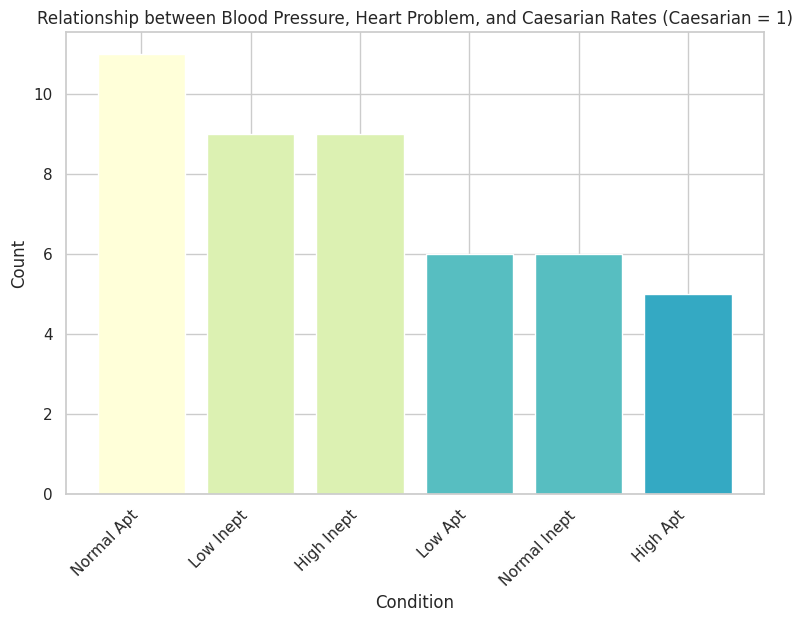

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))
bars = plt.bar(count_df['Condition'], count_df['Count'], color=colors)
plt.title('Relationship between Blood Pressure, Heart Problem, and Caesarian Rates (Caesarian = 1)')
plt.xlabel('Condition')
plt.ylabel('Count')
plt.colorbar(cm.ScalarMappable(cmap='viridis'), ax=plt.gca(), pad=0.1).remove()
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
print(raw_data_filtered['Blood of Pressure'].dtype)
print(raw_data_filtered['Heart Problem'].dtype)

object
object


In [ ]:
print(raw_data_filtered['Blood of Pressure'].unique())
print(raw_data_filtered['Heart Problem'].unique())

['1' '0' '2']
['0' '1']


In [ ]:
print(raw_data['Caesarian'].unique())

['0' '1']


In [ ]:
print(raw_data_filtered)
print(raw_data_filtered.describe())

   Age Delivery number Delivery time Blood of Pressure Heart Problem  \
1   26               2             0                 1             0   
4   22               2             0                 1             0   
7   32               3             0                 1             0   
9   27               1             1                 1             0   
11  33               1             1                 0             0   
14  29               1             2                 0             1   
17  20               1             2                 2             0   
18  37               3             0                 1             1   
19  24               1             2                 0             1   
21  33               2             0                 0             1   
23  27               1             0                 0             1   
24  20               1             0                 2             1   
26  18               1             1                 2          

In [ ]:
print(raw_data)

   Age Delivery number Delivery time Blood of Pressure Heart Problem Caesarian
0   22               1             0                 2             0         0
1   26               2             0                 1             0         1
2   26               2             1                 1             0         0
3   28               1             0                 2             0         0
4   22               2             0                 1             0         1
..  ..             ...           ...               ...           ...       ...
75  27               2             1                 1             0         0
76  33               4             0                 1             0         1
77  29               2             1                 2             0         1
78  25               1             2                 0             0         1
79  24               2             2                 1             0         0

[80 rows x 6 columns]


In [ ]:
print(raw_data_filtered)

   Age Delivery number Delivery time Blood of Pressure Heart Problem  \
1   26               2             0                 1             0   
4   22               2             0                 1             0   
7   32               3             0                 1             0   
9   27               1             1                 1             0   
11  33               1             1                 0             0   
14  29               1             2                 0             1   
17  20               1             2                 2             0   
18  37               3             0                 1             1   
19  24               1             2                 0             1   
21  33               2             0                 0             1   
23  27               1             0                 0             1   
24  20               1             0                 2             1   
26  18               1             1                 2          

In [ ]:
caesarian_counts = raw_data['Caesarian'].value_counts()
print(caesarian_counts)

1    46
0    34
Name: Caesarian, dtype: int64


In [ ]:
age_counts = raw_data_filtered['Age'].value_counts()
print(age_counts)

32    7
29    5
26    4
27    4
33    3
28    3
20    2
25    2
22    2
19    2
36    2
21    2
30    1
17    1
35    1
40    1
18    1
24    1
37    1
38    1
Name: Age, dtype: int64


In [ ]:
age_counts = raw_data['Age'].value_counts()
print(age_counts)

26    10
32     8
25     7
27     7
29     6
28     6
33     5
22     4
20     3
36     3
30     3
31     3
21     2
24     2
18     2
35     2
19     2
17     1
37     1
40     1
23     1
38     1
Name: Age, dtype: int64


In [ ]:
print(raw_data_filtered['Age'].unique())

['26' '22' '32' '27' '33' '29' '20' '37' '24' '18' '40' '28' '19' '36'
 '21' '30' '35' '25' '17' '38']


In [ ]:
unique_values = raw_data_filtered['Age'].unique()
print(unique_values)

['26' '22' '32' '27' '33' '29' '20' '37' '24' '18' '40' '28' '19' '36'
 '21' '30' '35' '25' '17' '38']


In [ ]:
unique_values_caesarian = raw_data_filtered['Caesarian'].unique()
print(unique_values_caesarian)

['1']


In [ ]:
age_counts_filtered = raw_data_filtered['Age'].value_counts().sort_index()
age_counts_raw = raw_data['Age'].value_counts().sort_index()

print("Value counts in raw_data_filtered:")
print(age_counts_filtered)

print("\nValue counts in raw_data:")
print(age_counts_raw)

Value counts in raw_data_filtered:
17    1
18    1
19    2
20    2
21    2
22    2
24    1
25    2
26    4
27    4
28    3
29    5
30    1
32    7
33    3
35    1
36    2
37    1
38    1
40    1
Name: Age, dtype: int64

Value counts in raw_data:
17     1
18     2
19     2
20     3
21     2
22     4
23     1
24     2
25     7
26    10
27     7
28     6
29     6
30     3
31     3
32     8
33     5
35     2
36     3
37     1
38     1
40     1
Name: Age, dtype: int64


In [ ]:
print(unique_values)

['26' '22' '32' '27' '33' '29' '20' '37' '24' '18' '40' '28' '19' '36'
 '21' '30' '35' '25' '17' '38']


In [ ]:
print((raw_data_filtered).dtypes)

Age                  object
Delivery number      object
Delivery time        object
Blood of Pressure    object
Heart Problem        object
Caesarian            object
Condition            object
dtype: object


In [ ]:
unique_ages_raw_data = raw_data['Age'].unique()
unique_ages_filtered = raw_data_filtered['Age'].unique()

In [ ]:
print("Unique Ages in raw_data:", unique_ages_raw_data)
print("Unique Ages in raw_data_filtered:", unique_ages_filtered)

Unique Ages in raw_data: ['22' '26' '28' '27' '32' '36' '33' '23' '20' '29' '25' '37' '24' '18'
 '30' '40' '31' '19' '21' '35' '17' '38']
Unique Ages in raw_data_filtered: ['26' '22' '32' '27' '33' '29' '20' '37' '24' '18' '40' '28' '19' '36'
 '21' '30' '35' '25' '17' '38']


In [ ]:
missing_values_filtered = raw_data_filtered[raw_data_filtered['Age'].isnull()]
print("Missing values in raw_data_filtered:", missing_values_filtered)

Missing values in raw_data_filtered: Empty DataFrame
Columns: [Age, Delivery number, Delivery time, Blood of Pressure, Heart Problem, Caesarian, Condition]
Index: []


In [ ]:
non_numeric_values_raw_data = raw_data[~raw_data['Age'].str.isnumeric()]
print("Non-numeric values in raw_data:", non_numeric_values_raw_data)


Non-numeric values in raw_data: Empty DataFrame
Columns: [Age, Delivery number, Delivery time, Blood of Pressure, Heart Problem, Caesarian]
Index: []


In [ ]:
#Data Visualization 3: Distribution of Caesarian 'Yes' by Age
age_counts_filtered = raw_data_filtered['Age'].value_counts().sort_index()

In [ ]:
print("Value counts in raw_data_filtered:")
print(age_counts_filtered)

Value counts in raw_data_filtered:
17    1
18    1
19    2
20    2
21    2
22    2
24    1
25    2
26    4
27    4
28    3
29    5
30    1
32    7
33    3
35    1
36    2
37    1
38    1
40    1
Name: Age, dtype: int64


In [ ]:
raw_data_filtered['Age'] = pd.to_numeric(raw_data_filtered['Age'], errors='coerce')

In [ ]:
age_counts_filtered = raw_data_filtered['Age'].value_counts().sort_index()

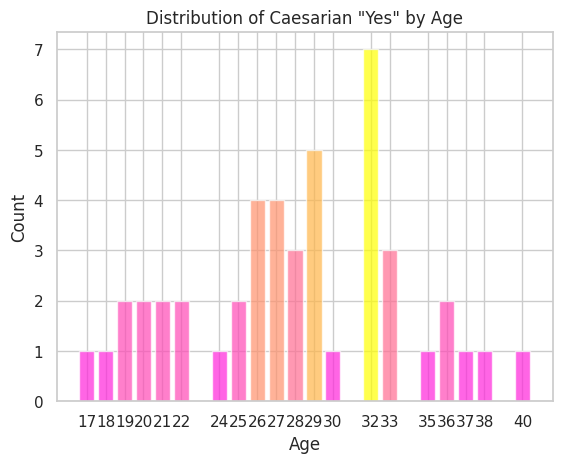

In [ ]:
plt.bar(age_counts_filtered.index, height=age_counts_filtered.values,
color=plt.cm.spring(age_counts_filtered.values/age_counts_filtered.values.max()), alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Caesarian "Yes" by Age')
plt.xticks(age_counts_filtered.index)
plt.show()

In [ ]:
print(raw_data)

   Age Delivery number Delivery time Blood of Pressure Heart Problem Caesarian
0   22               1             0                 2             0         0
1   26               2             0                 1             0         1
2   26               2             1                 1             0         0
3   28               1             0                 2             0         0
4   22               2             0                 1             0         1
..  ..             ...           ...               ...           ...       ...
75  27               2             1                 1             0         0
76  33               4             0                 1             0         1
77  29               2             1                 2             0         1
78  25               1             2                 0             0         1
79  24               2             2                 1             0         0

[80 rows x 6 columns]


In [ ]:
#Building Machine Learning Predictive Model
X = raw_data.drop('Caesarian', axis=1)
y = raw_data['Caesarian']

In [ ]:
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

In [ ]:
decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [ ]:
naive_bayes = GaussianNB()
naive_bayes.fit(X_train, y_train)

GaussianNB()

In [ ]:
#Evaluating Machine Learning Predictive Model
def evaluate_model(model_name, y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='binary')
    recall = recall_score(y_true, y_pred, average='binary')
    return accuracy, precision, recall

In [ ]:
y_pred_dt = decision_tree.predict(X_test)
y_pred_nb = naive_bayes.predict(X_test)

In [ ]:
y_pred_dt_int = y_pred_dt.astype(int)
y_pred_nb_int = y_pred_nb.astype(int)

In [ ]:
y_test_int = y_test.astype(int)
y_pred_dt_int = y_pred_dt.astype(int)

In [ ]:
accuracy_dt, precision_dt, recall_dt = evaluate_model("Decision Tree", y_test_int, y_pred_dt_int)
accuracy_nb, precision_nb, recall_nb = evaluate_model("Naive Bayes", y_test_int, y_pred_nb_int)

In [ ]:
model_name = "Mock Caesarian Section Predictive Model"

In [ ]:
print(f"{model_name} Model (Decision Tree):")
print(f"Accuracy: {accuracy_dt:.2f}")
print(f"Precision: {precision_dt:.2f}")
print(f"Recall: {recall_dt:.2f}")
print("\n")

Mock Caesarian Section Predictive Model Model (Decision Tree):
Accuracy: 0.44
Precision: 0.57
Recall: 0.40




In [ ]:
print(f"{model_name} Model (Naive Bayes):")
print(f"Accuracy: {accuracy_nb:.2f}")
print(f"Precision: {precision_nb:.2f}")
print(f"Recall: {recall_nb:.2f}")
print("\n")

Mock Caesarian Section Predictive Model Model (Naive Bayes):
Accuracy: 0.69
Precision: 0.73
Recall: 0.80


